In [1]:
import pandas as pd
from datetime import datetime
import os, os.path, pickle, sys
import matplotlib
import matplotlib.pyplot as plt

sys.path.append("/Users/hn/Documents/00_GitHub/Rangeland/Python_Codes/")
import rangeland_core as rc

In [2]:
data_dir_base = "/Users/hn/Documents/01_research_data/RangeLand/Data/"
census_population_dir = data_dir_base + "census/"
# Shannon_data_dir = data_dir_base + "Shannon_Data/"
# USDA_data_dir = data_dir_base + "/NASS_downloads/"
param_dir = data_dir_base + "parameters/"
Min_data_base = data_dir_base + "Min_Data/"
reOrganized_dir = data_dir_base + "reOrganized/"

In [3]:
shannon_annual = pd.read_csv(reOrganized_dir + "Shannon_Beef_Cows_fromCATINV.csv")
shannon_annual.reset_index(drop=True, inplace=True)
shannon_annual.head(2)

,state,1920,1921,1922,1923,1924,1925,1926,1927,1928,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AL,103000.0,106000.0,108000.0,111000.0,114000.0,104000.0,100000.0,96000.0,94000.0,...,680000.0,701000.0,681000.0,652000.0,673000.0,693000.0,714000.0,705000.0,696000.0,697000.0
1,AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5300.0,5000.0,4300.0,4300.0,4000.0,4700.0,6100.0,6800.0,7700.0,7300.0


In [18]:
import itertools

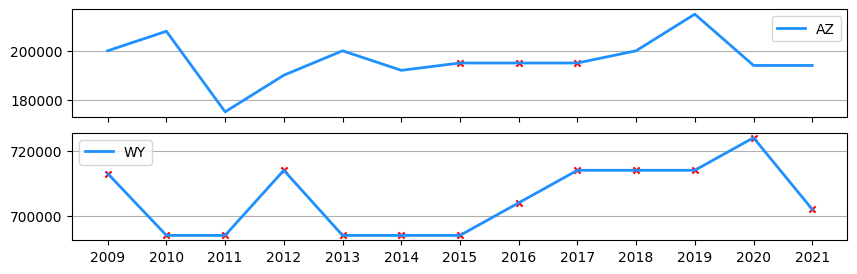

In [123]:
fig, axs = plt.subplots(2, 1, figsize=(10, 3), sharex=True,
                        gridspec_kw={"hspace": 0.15, "wspace": 0.05})
axs[0].grid(axis="y", which="both")
axs[1].grid(axis="y", which="both")

state_ = "AZ"
B = shannon_annual[shannon_annual.state==state_].copy()

axs[0].plot(list(B.columns[90:].values), 
         B[B.columns[90:]].values[0], 
         c="dodgerblue", linewidth=2, label=state_, markevery=25);

axs[0].scatter(["2015", "2016", "2017"], 
            list(B[["2015", "2016", "2017"]].values[0]), 
            s = 20, c="r", marker="x");

# axs.plot(["2015", "2016", "2017"], B[["2015", "2016", "2017"]].values[0], c="r", linewidth=2, label=state_);

state_ = "WY"
yrs = [str(x) for x in range(2009, 2022)]
B = shannon_annual[shannon_annual.state==state_].copy()

axs[1].plot(yrs, 
            B[yrs].values[0], 
            c="dodgerblue", linewidth=2, label=state_, markevery=25);

axs[1].scatter(yrs, list(B[yrs].values[0]), s = 20, c="r", marker="x");



# axs.plot(["2015", "2016", "2017"], 
#          B[["2015", "2016", "2017"]].values[0], 
#          color = 'b', marker='o', markerfacecolor='r', markersize=5);

# odd_i = itertools.islice(B.columns[90:], 0, None, 3);
# odd_i = list(itertools.chain(odd_i));
# plt.xticks(odd_i, odd_i, rotation="vertical");
axs[0].legend(loc="best");
axs[1].legend(loc="best");

plots_dir = data_dir_base + "plots/"
fig_name = plots_dir + "shannon_quality" + ".pdf"
plt.savefig(fname=fig_name, dpi=100, bbox_inches="tight")
